Erstes ML-Modell mit SciKit-Learn

In [13]:
import pandas as pd
import numpy as np
import sklearn as sk

Laden der zwei Datasets Walking, Jumping

In [14]:
df_run = pd.read_json("walking.json")

df_jump = pd.read_json("jumping.json")

In [15]:
df_run.head()

,sensor,time,seconds_elapsed,z,y,x,relativeAltitude,pressure,version,device name,recording time,platform,appVersion,device id,sensors,sampleRateMs
0,Accelerometer,1.680094e+18,-2.581087e+06,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AccelerometerUncalibrated,1.682675e+18,7.725342e-03,-0.814392,-0.224945,0.091278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AccelerometerUncalibrated,1.682675e+18,1.778906e-02,-0.866867,-0.202026,0.093414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AccelerometerUncalibrated,1.682675e+18,2.785327e-02,-0.972351,-0.206985,0.071457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AccelerometerUncalibrated,1.682675e+18,3.791602e-02,-1.046967,-0.221313,0.047256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_jump.head()

,sensor,time,seconds_elapsed,z,y,x,relativeAltitude,pressure,version,device name,recording time,platform,appVersion,device id,sensors,sampleRateMs
0,Accelerometer,1.680094e+18,-2.580953e+06,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AccelerometerUncalibrated,1.682675e+18,1.266040e-02,-0.631042,-0.439758,0.100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AccelerometerUncalibrated,1.682675e+18,2.272437e-02,-0.633957,-0.460037,0.071823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AccelerometerUncalibrated,1.682675e+18,3.278833e-02,-0.648392,-0.509354,0.051224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AccelerometerUncalibrated,1.682675e+18,4.285132e-02,-0.650299,-0.554092,0.033859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Extraktion von 3 lediglich Sensor Daten: Acceleration Data Uncalibrated

In [17]:
#preprocessing data
df_run['time'] = pd.to_datetime(df_run['time'])
df_jump['time'] = pd.to_datetime(df_jump['time'])

df_run = df_run.set_index('time')
df_jump = df_jump.set_index('time')

df_run.head()

,sensor,seconds_elapsed,z,y,x,relativeAltitude,pressure,version,device name,recording time,platform,appVersion,device id,sensors,sampleRateMs
time,,,,,,,,,,,,,,,
2023-03-29 12:42:42.240752384,Accelerometer,-2.581087e+06,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-28 09:40:49.120725248,AccelerometerUncalibrated,7.725342e-03,-0.814392,-0.224945,0.091278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-28 09:40:49.130789120,AccelerometerUncalibrated,1.778906e-02,-0.866867,-0.202026,0.093414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-28 09:40:49.140853248,AccelerometerUncalibrated,2.785327e-02,-0.972351,-0.206985,0.071457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-28 09:40:49.150916096,AccelerometerUncalibrated,3.791602e-02,-1.046967,-0.221313,0.047256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Extraktion der richtigen Sensor-Daten:

In [19]:
df_run_acc = df_run[df_run['sensor'] == 'AccelerometerUncalibrated']
df_jump_acc = df_jump[df_jump['sensor'] == 'AccelerometerUncalibrated']

In [ ]:
df_run_acc = df_run_acc[['z','x','y']]
df_jump_acc = df_jump_acc[['z','x','y']]

Erstellung eines Trainings und Test-Datensatzes:

<Axes: xlabel='time'>

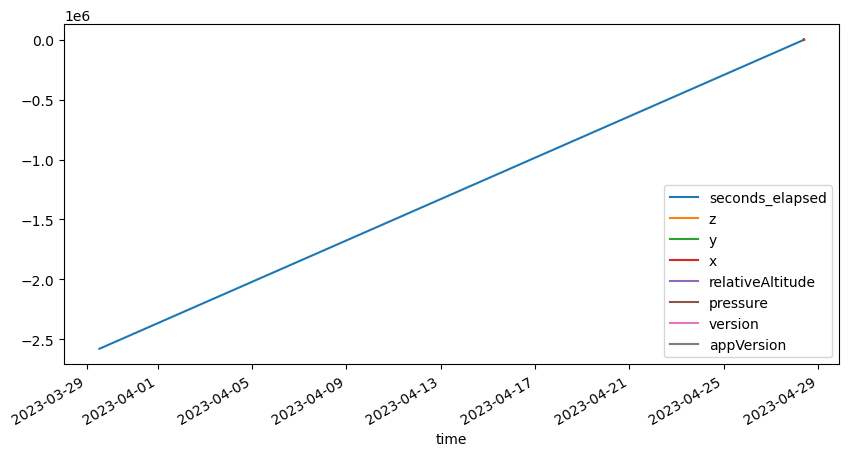

In [20]:
df_jump.plot(figsize=(10,5))